# CytoNormPy - Plotting

This vignettes showcases the plotting functionality of cytonormpy!

We use the builtin cytonorm object.

In [1]:
import cytonormpy as cnp
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cn = cnp.example_cytonorm()

normalized file Gates_PTLG034_Unstim_Control_2.fcs
normalized file Gates_PTLG021_Unstim_Control_1.fcs
normalized file Gates_PTLG028_Unstim_Control_1.fcs
normalized file Gates_PTLG021_Unstim_Control_2.fcs
normalized file Gates_PTLG034_Unstim_Control_1.fcs
normalized file Gates_PTLG028_Unstim_Control_2.fcs


In [2]:
cnpl = cnp.Plotter(cytonorm = cn)

In [3]:
files = cn._datahandler.all_file_names
files

['Gates_PTLG021_Unstim_Control_1.fcs',
 'Gates_PTLG028_Unstim_Control_1.fcs',
 'Gates_PTLG034_Unstim_Control_1.fcs',
 'Gates_PTLG021_Unstim_Control_2.fcs',
 'Gates_PTLG028_Unstim_Control_2.fcs',
 'Gates_PTLG034_Unstim_Control_2.fcs']

## Scatter plots

We can plot scatter plots, visualizing the data as a dot plot.

If we display the reference, the datapoints of the corresponding reference file will be shown. In this case, we display the original and transformed data points for 'Gates_PTLG021_Unstim_Control_2.fcs', while 'Gates_PTLG021_Unstim_Control_1.fcs' served as a control.

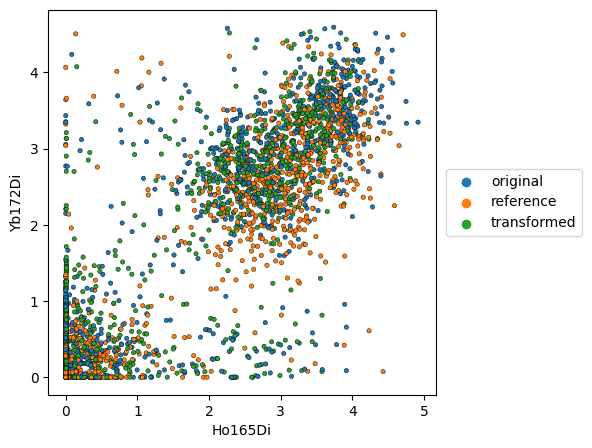

In [4]:
cnpl.scatter(file_name = files[3],
             x_channel = "Ho165Di",
             y_channel = "Yb172Di",
             display_reference = True,
             figsize = (5,5),
             s = 10,
             edgecolor = "black",
             linewidth = 0.3)

## Histogram plots

By using a histogram plot, we can closely follow the respective distributions before and after normalization.

If we display the reference, the datapoints of the corresponding reference file will be shown. In this case, we display the original and transformed data points for 'Gates_PTLG021_Unstim_Control_2.fcs', while 'Gates_PTLG021_Unstim_Control_1.fcs' served as a control.

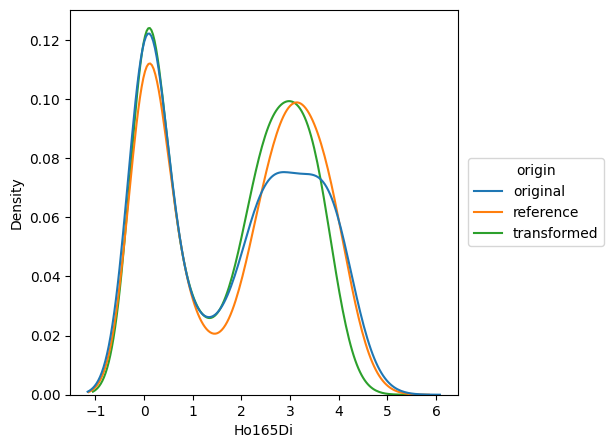

In [5]:
cnpl.histogram(file_name = files[3],
               x_channel = "Ho165Di",
               x_scale = "linear",
               display_reference = True,
               figsize = (5,5))

## Spline Plots

To visualize the spline functions created by cytonormpy, we use the splineplot.

This plot shows the expression values of the file against the goal distribution. Further, the specified quantiles of the expression values are marked.

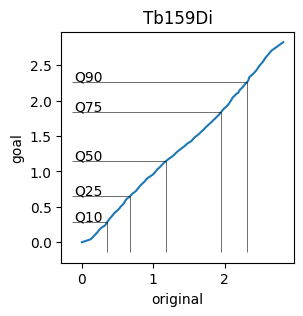

In [6]:
cnpl.splineplot(file_name = files[3],
                channel = "Tb159Di",
                x_scale = "linear",
                y_scale = "linear",
                figsize = (3,3))

## EMD evaluation

To visualize the changes in the earth mover's distance we create scatterplots, where the EMD of the original files and the EMD of the normalized files are plotted.

The colorby parameter can be set to 'label', 'improvement' or 'channel'

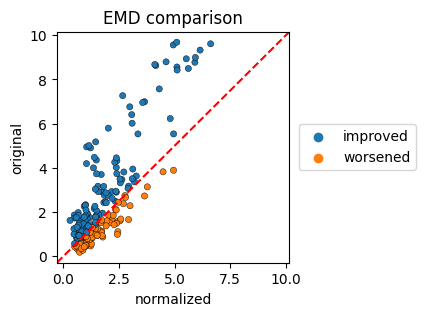

In [7]:
cnpl.emd(colorby = "improvement", figsize = (3,3), s = 20, edgecolor = "black", linewidth = 0.3)

## MAD evaluation

To visualize the changes in the earth mover's distance we create scatterplots, where the EMD of the original files and the EMD of the normalized files are plotted.

The colorby parameter can be set to 'label', 'improvement' or 'channel'. The red lines correspond to the MAD-change cutoff, the default is set to 0.25.

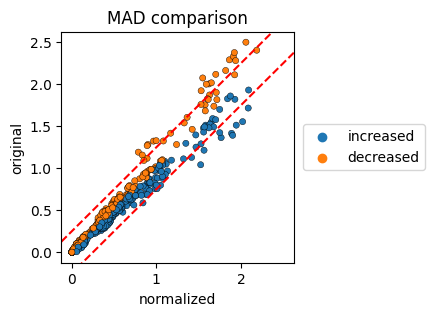

In [8]:
cnpl.mad(colorby = "change", figsize = (3,3), s = 20, edgecolor = "black", linewidth = 0.3)

# CytoNormPy - Overview Plotting

The plots shown above should cover most use cases. In order to provide additional overviews, CytoNormPy implements grid functionalities that allow a quick overview over the data.

## Histogram overview

First, we will focus on the histogram plot. We pass the parameter `grid='channels'` in order to get a FacetGrid-like overview over all channels.

Note that we are extracting the figure using `show=False` and `return_fig=True` in order to apply matplotlibs `.tight_layout()` method.

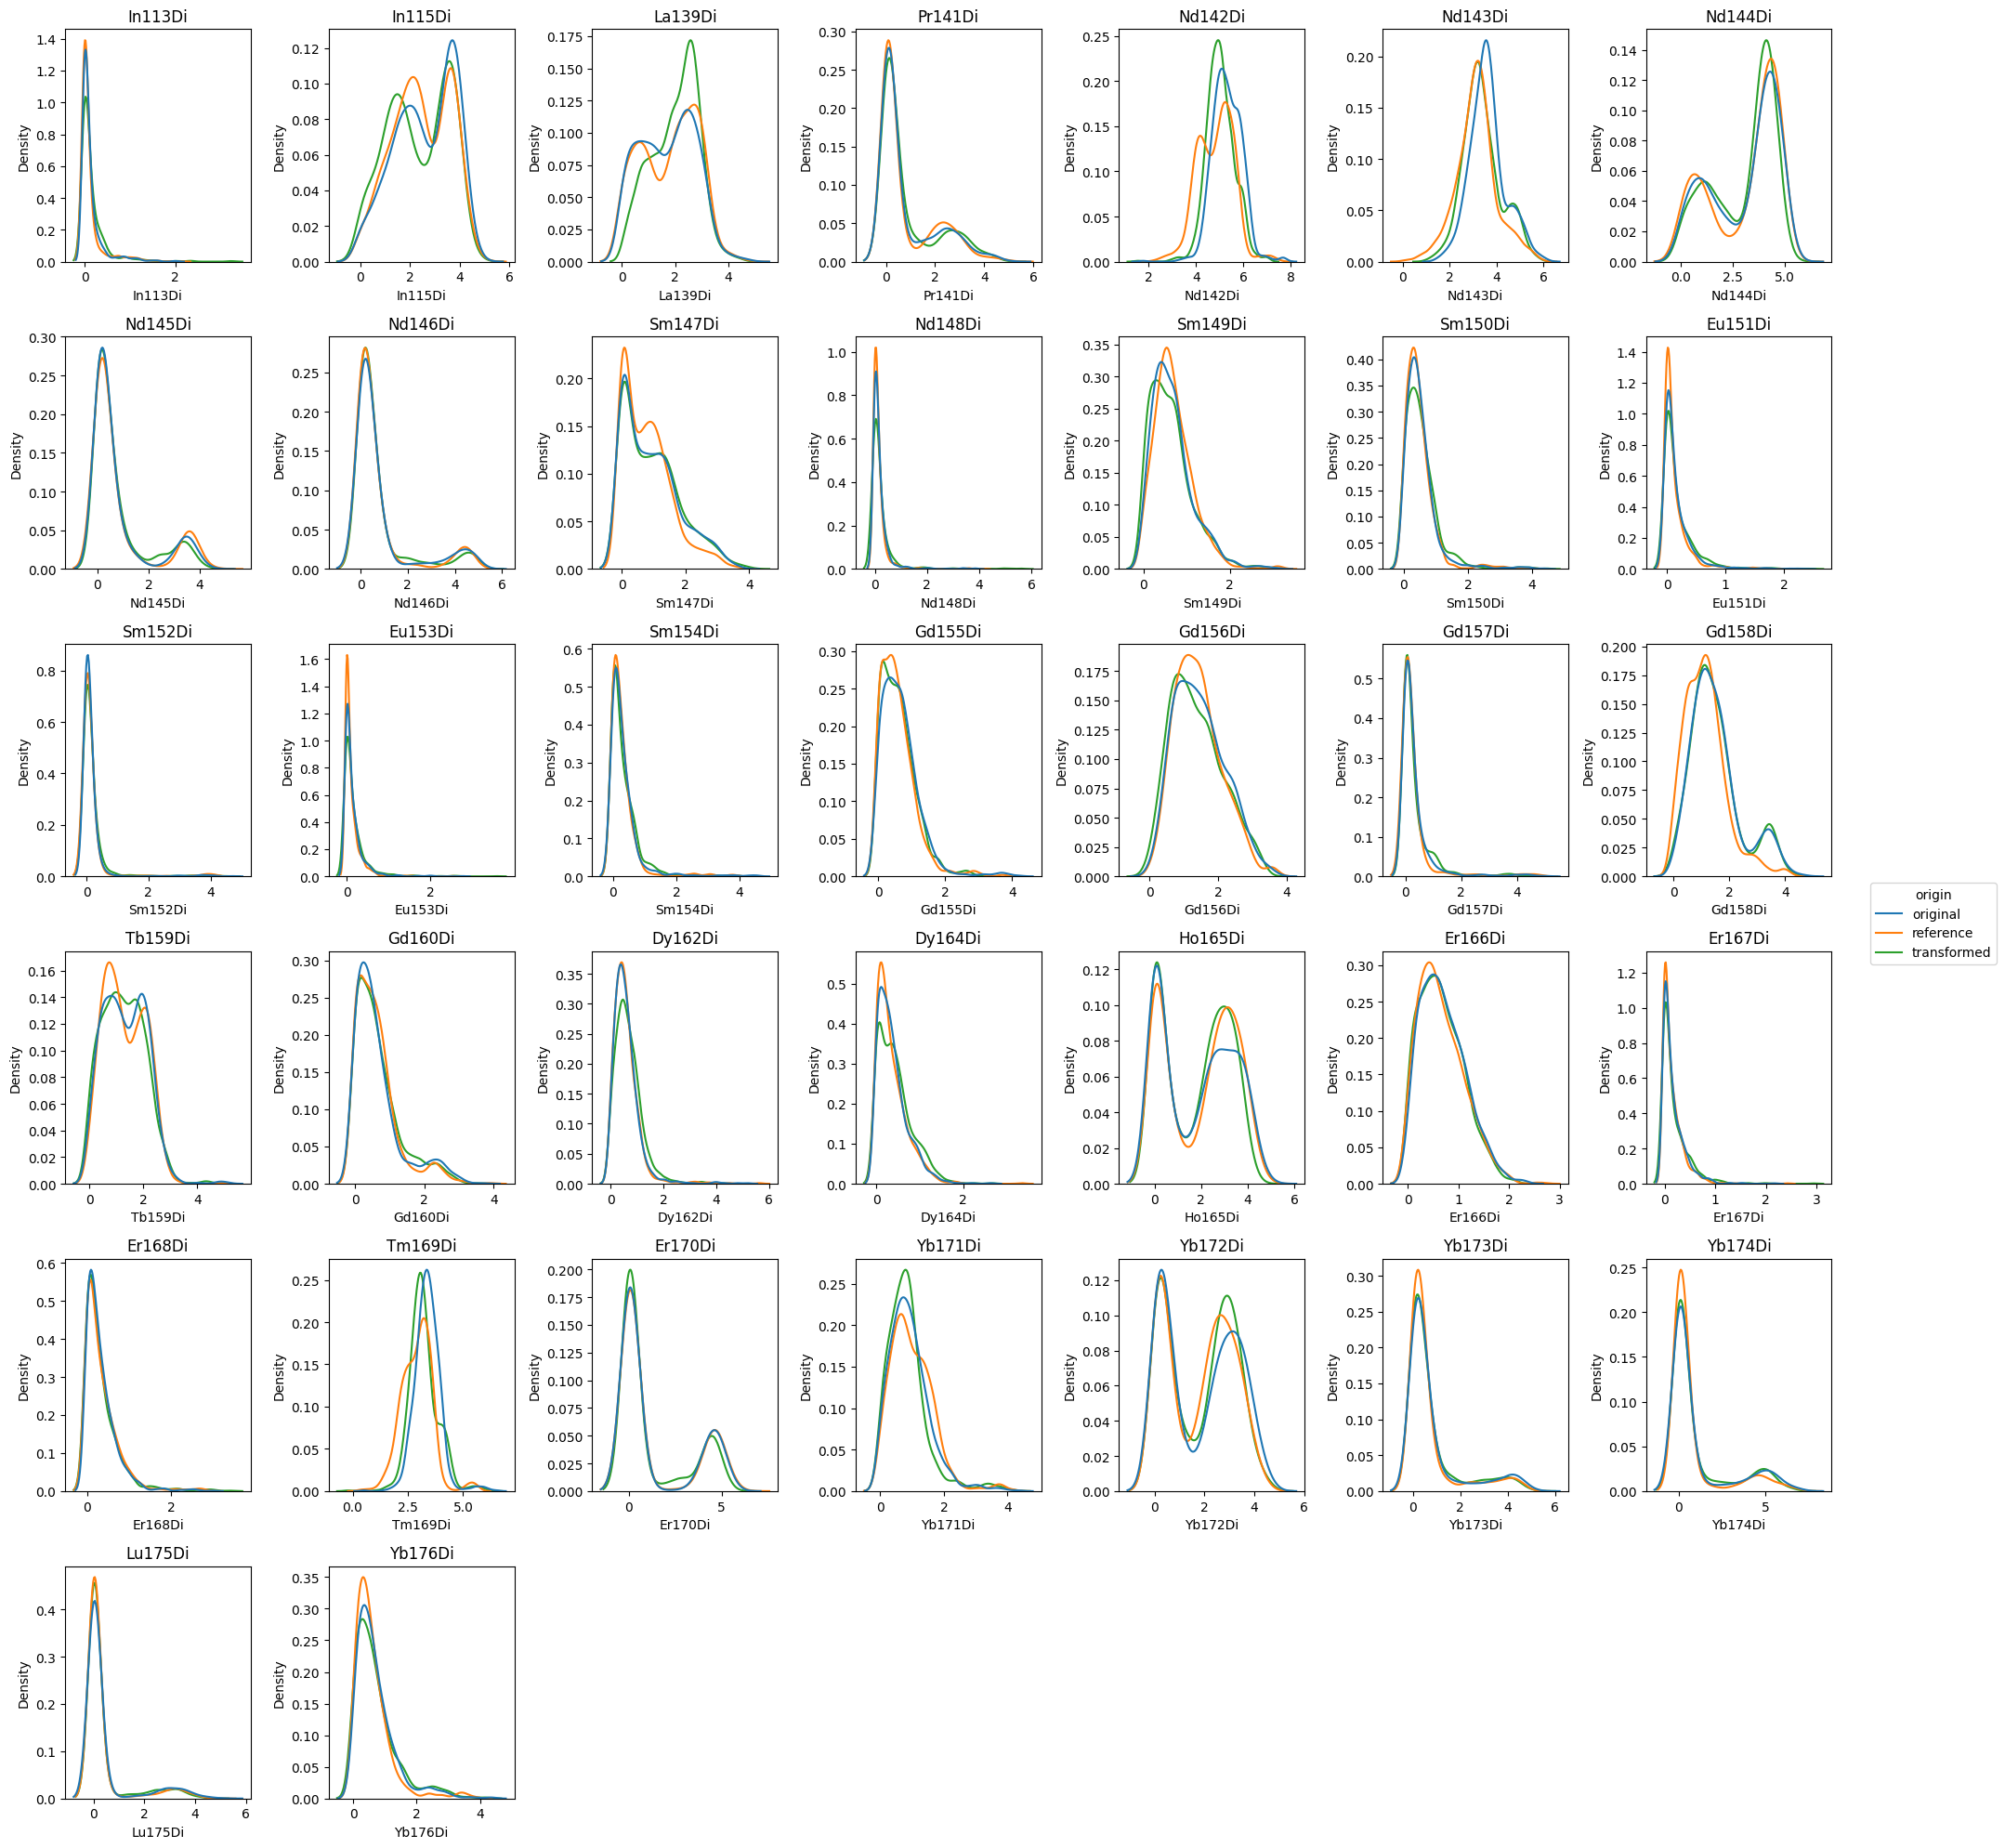

In [9]:
fig = cnpl.histogram(file_name = files[3],
                     x_channel = "Nd142Di",
                     x_scale = "linear",
                     display_reference = True,
                     grid = "channels",
                     figsize = (20,20),
                     show = False,
                     return_fig = True)
fig.tight_layout()
plt.show()

## MAD comparison overview

We next create the MAD comparison plot per cell label. By passing `grid="label"`, we obtain a faceted plot grouped by the cell_label that we provided in the calculations.



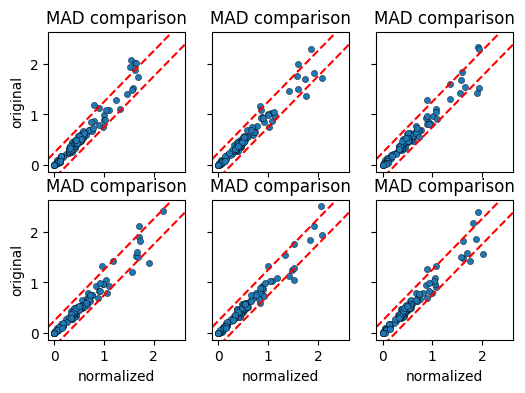

In [10]:
cnpl.mad(colorby = "label",
         figsize = (6,4),
         s = 20,
         edgecolor = "black",
         linewidth = 0.3,
         grid = "label")

## EMD comparison overview

Finally, we create the EMD comparison plot per cell label. By passing `grid="label"`, we obtain a faceted plot grouped by the cell_label that we provided in the calculations. We further specify `colorby="improvement"` in order to retain the information regarding the EMD change.



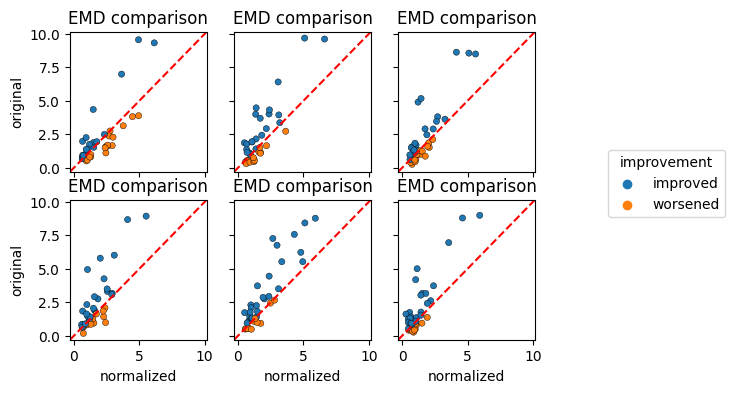

In [11]:
cnpl.emd(colorby = "improvement",
         figsize = (6,4),
         s = 20,
         edgecolor = "black",
         linewidth = 0.3,
         grid = "label")

# CytoNormPy - Plot customization

We saw above how to extract the matplotlib Figure via `return_fig=True`.

In order to further customize plots, the underlying matplotlib axes can be returned by setting `show=False` and providing an `axes` that has been created previously via matplotlib. That way, we have full control over the axis and can customize the plot.

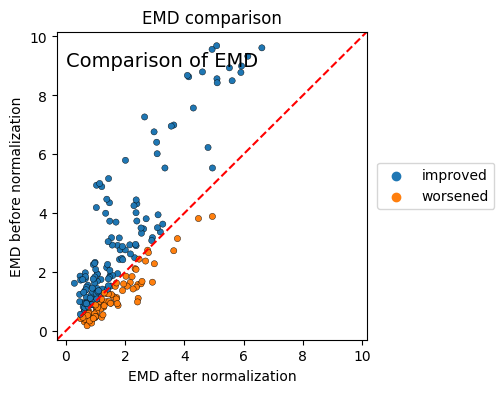

In [12]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (4,4))
cnpl.emd(colorby = "improvement",
         s = 20,
         edgecolor = "black",
         linewidth = 0.3,
         show = False,
         ax = ax)
ax.set_title("EMD comparison")
ax.set_xlabel("EMD after normalization")
ax.set_ylabel("EMD before normalization")
ax.text(0, 9, "Comparison of EMD", fontsize = 14)
plt.show()